# Video Games Sales with Rating
### Steps we gonna do:
- Data cleansing
- Visualization and analysis
- Feature selection and model selection
- Evaluation

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
vg = pd.read_csv('./vgsales.csv')
vg = vg.dropna(axis=0)
vg.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, we have:
- Critic_score - Aggregate score compiled by Metacritic staff
- Critic_count - The number of critics used in coming up with the Critic_score
- User_score - Score by Metacritic's subscribers
- User_count - Number of users who gave the user_score
- Developer - Party responsible for creating the game
- Rating - The ESRB ratings

In [21]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [22]:
vg['User_Score'] = pd.to_numeric(vg['User_Score'])
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null float64
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


In [23]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [24]:
vg.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

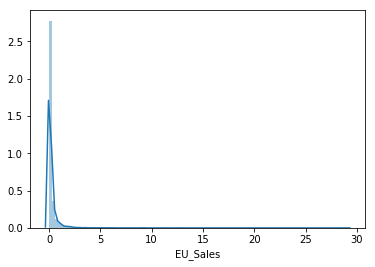

In [25]:
sns.distplot(vg['EU_Sales'], bins=100)

In [26]:
vg.iloc[5000:5010]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9772,Mytran Wars,PSP,2009.0,Strategy,Deep Silver,0.08,0.02,0.00,0.02,0.12,68.0,16.0,8.8,4.0,Stormregion,T
9774,NCIS,PS3,2011.0,Adventure,Ubisoft,0.07,0.04,0.00,0.02,0.12,50.0,4.0,4.0,4.0,Ubisoft,T
9775,Undead Knights,PSP,2009.0,Action,Ubisoft Annecy,0.05,0.00,0.06,0.01,0.12,63.0,27.0,8.0,13.0,Now Production,M
9776,Ninja Reflex,Wii,2008.0,Action,Electronic Arts,0.11,0.00,0.00,0.01,0.12,49.0,26.0,6.0,11.0,Sanzaru Games,E10+
9777,Cel Damage,XB,2001.0,Racing,Electronic Arts,0.09,0.03,0.00,0.00,0.12,65.0,24.0,8.4,7.0,Pseudo Interactive,T
9782,Supremacy MMA,PS3,2011.0,Fighting,505 Games,0.07,0.03,0.00,0.02,0.12,47.0,17.0,6.5,4.0,Kung Fu Factory,M
9785,Lunar: Dragon Song,DS,2005.0,Role-Playing,Rising Star Games,0.11,0.00,0.00,0.01,0.12,59.0,30.0,6.2,17.0,"Game Arts, Japan Art Media (JAM)",E10+
9786,Breakdown,XB,2004.0,Adventure,Electronic Arts,0.09,0.03,0.00,0.00,0.12,71.0,62.0,8.2,17.0,Namco,M
9790,Venetica,PS3,2010.0,Role-Playing,DTP Entertainment,0.07,0.03,0.00,0.01,0.12,47.0,14.0,6.5,6.0,Deck 13,T
9791,Looney Tunes: Sheep Raider,PS,2001.0,Platform,Infogrames,0.07,0.05,0.00,0.01,0.12,72.0,12.0,8.8,25.0,Infogrames,E


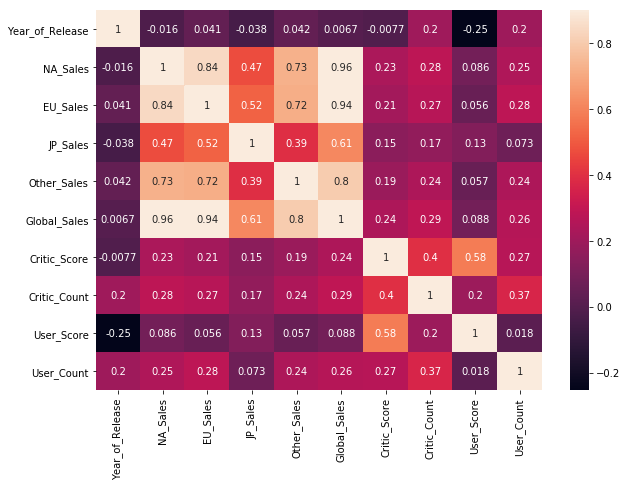

In [27]:
vg_corr = vg.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(vg_corr, annot=True, vmax=.9);

<Figure size 1008x1008 with 0 Axes>

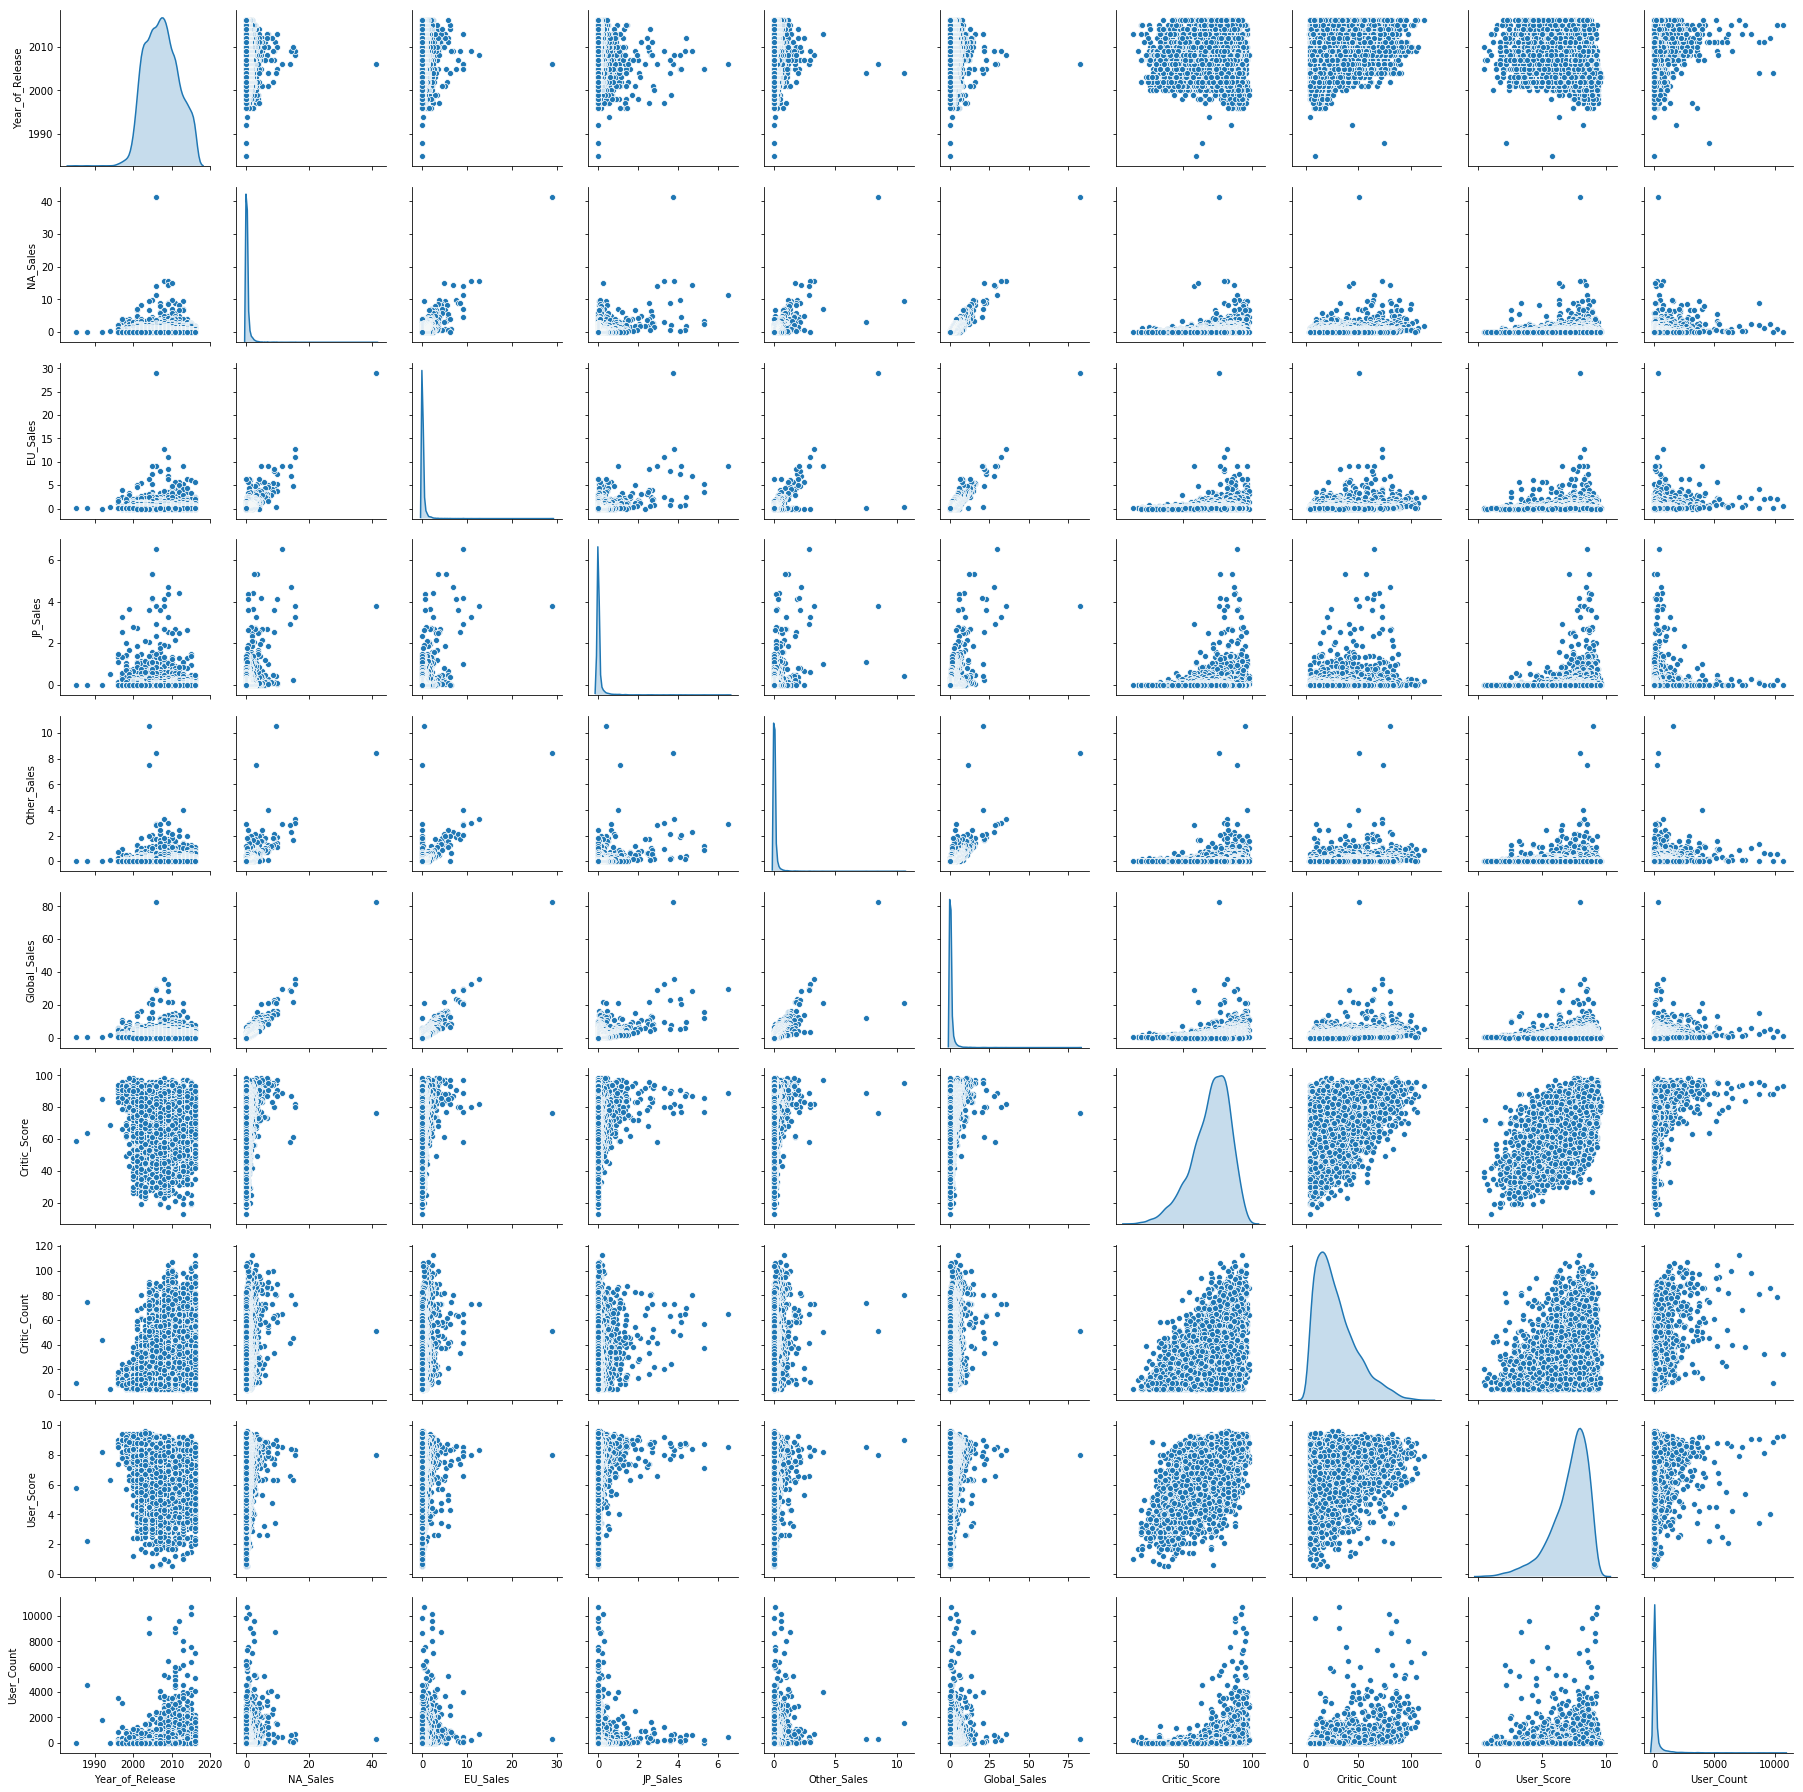

In [28]:
plt.figure(figsize=(14, 14))
sns.pairplot(vg, diag_kind='kde');

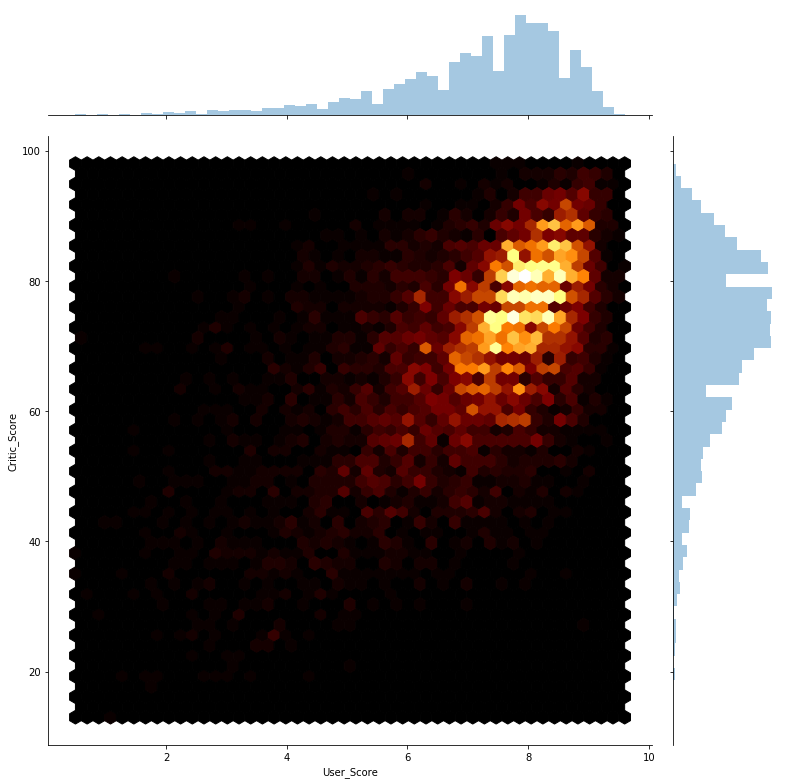

In [29]:
sns.jointplot(x="User_Score", y="Critic_Score", data=vg, kind='hex', cmap= 'afmhot', height=11)

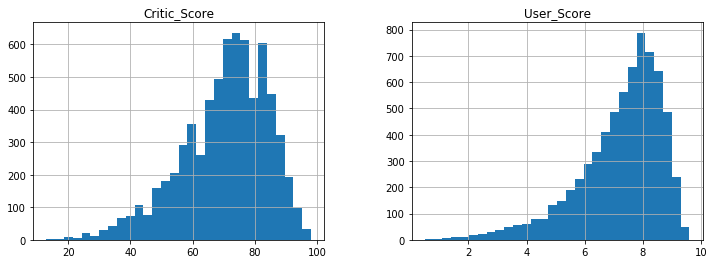

In [30]:
%matplotlib inline
vg[['User_Score','Critic_Score']].hist(bins=30, figsize=(12,4))
plt.show()

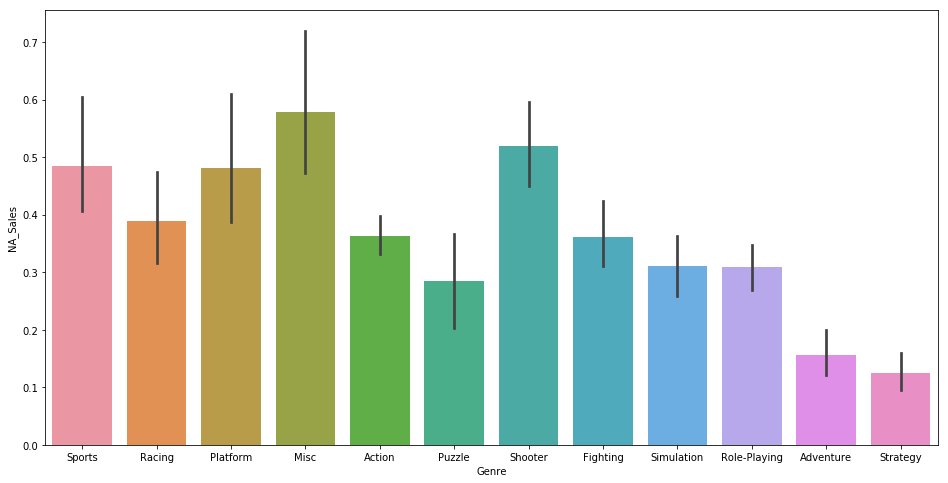

In [31]:
f, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='Genre', y='NA_Sales', data=vg, ax=ax)

Look for outliers:

In [32]:
vg_numeric = vg.select_dtypes(include=['float64'])
Q1 = vg_numeric.quantile(0.25)
Q3 = vg_numeric.quantile(0.75)
IQR = Q3 - Q1
((vg_numeric < (Q1 - 1.5 * IQR)) | (vg_numeric > (Q3 + 1.5 * IQR))).sum()

Year_of_Release       3
NA_Sales            704
EU_Sales            759
JP_Sales           1485
Other_Sales         786
Global_Sales        680
Critic_Score        105
Critic_Count        173
User_Score          264
User_Count          982
dtype: int64

Very challanging for training. So many outliers that could lead to bad model prediction result. Several options to take are:
- Trying some outlier-resistant model, such as random forest,
- Clean the data as far as we can. Try using standard deviation as the limit reference
- Normalize the data. We'll try this first

In [33]:
vg_numeric = vg_numeric.drop(['Year_of_Release'], axis=1)
vg_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 9 columns):
NA_Sales        6825 non-null float64
EU_Sales        6825 non-null float64
JP_Sales        6825 non-null float64
Other_Sales     6825 non-null float64
Global_Sales    6825 non-null float64
Critic_Score    6825 non-null float64
Critic_Count    6825 non-null float64
User_Score      6825 non-null float64
User_Count      6825 non-null float64
dtypes: float64(9)
memory usage: 853.2 KB


In [34]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
vg_numeric_scaled = min_max_scaler.fit_transform(vg_numeric) 
vg_numeric_scaled = pd.DataFrame(vg_numeric_scaled, columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'])
vg_numeric_scaled.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1.000000,1.000000,0.580000,0.799432,1.000000,0.741176,0.436364,0.824176,0.029828
1,0.379110,0.440608,0.583077,0.311258,0.430320,0.811765,0.636364,0.857143,0.066129
2,0.377418,0.377417,0.504615,0.279092,0.396995,0.788235,0.636364,0.824176,0.017634
3,0.272727,0.315608,1.000000,0.272469,0.361003,0.894118,0.563636,0.879121,0.040053
4,0.337524,0.316989,0.450769,0.268685,0.350339,0.529412,0.345455,0.670330,0.011725
5,0.349130,0.239641,0.723077,0.211921,0.343068,0.870588,0.700000,0.868132,0.055342
6,0.234768,0.257942,0.635385,0.179754,0.281144,0.917647,0.554545,0.890110,0.043148
7,0.215667,0.277279,0.553846,0.203406,0.274964,0.788235,0.545455,0.791209,0.013320
8,0.362669,0.168854,0.036923,0.159886,0.264178,0.564706,0.381818,0.637363,0.009568
9,0.217843,0.293163,0.389231,0.167455,0.263936,0.788235,0.272727,0.758242,0.004502


# Action Games Analysis

In [ ]:
vg_action = vg[vg.Genre == 'Action']
vg_action.head()

In [ ]:
vg_action.info()

In [ ]:
plt.figure(figsize=(14, 14))
sns.pairplot(vg_action, diag_kind='kde');

In [ ]:
sns.countplot(y="Publisher", data=vg_action, order = vg_action['Publisher'].value_counts().sort_values(ascending=False).iloc[:10].index)

# Nintendo Analysis

In [ ]:
vg_nintendo = vg[vg.Publisher == 'Nintendo']
sns.countplot(y="Genre", data=vg_nintendo, order = vg_nintendo['Genre'].value_counts().sort_values(ascending=False).iloc[:10].index)

In [ ]:
vg_nintendo.info()

In [ ]:
plt.figure(figsize=(14, 14))
sns.pairplot(vg_nintendo, diag_kind='kde');

In [ ]:
vg_nintendo_corr = vg_nintendo.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(vg_nintendo_corr, annot=True, vmax=.9);